# Titanic Classification :
### Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

### About the Dataset
#### Description:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### Acknowledgements:
This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.

#### Objective:
Understand the Dataset & cleanup (if required).
Build a strong classification model to predict whether the passenger survives or not.

#### Columns Information
1) Passenger ID - To identify unique passengers   
2) Survived - If they survived or not (0 = Dead 1 = Alive)       
3) P Class - The class passengers travelled in          
4) Name - Passenger Name         
5) Sex - Gender of Passenger          
6) Age - Age of passenger           
7) SibSp - Number of siblings or spouse         
8) Parch - Parent or child          
9) Ticket - Ticket number           
10) Fare - Amount paid for the ticket         
11) Cabin - Cabin of residence            
12) Embarked - Point of embarkment (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Titanic dataset
titanic_data= pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Total Rows and Columns
titanic_data.shape

(891, 12)

In [4]:
titanic_data["Survived"].unique() #Binary Classification

array([0, 1], dtype=int64)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [7]:
titanic_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Dropping Unnecessary Columns.

In [8]:
# Removing the 'Cabin' column as it has 77% null values.
titanic_data=titanic_data.drop(["Cabin"], axis=1)

In [9]:
titanic_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [10]:
id_cols=["PassengerId","Name","Ticket"]
cont_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
target=["Survived"]
len(id_cols)+len(cont_cols)+len(cat_cols)

11

In [11]:
# Name of passengers, Ticket name and Passenger Id won't help us in any analysis, hence dropping those columns. 
titanic_data = titanic_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [12]:
titanic_data.shape

(891, 8)

### Handle missing values

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [14]:
titanic_data.isnull().mean()*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

## EDA

In [15]:
titanic_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [16]:
id_cols=["PassengerId","Name","Ticket"]
cont_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
target=["Survived"]
len(id_cols)+len(cont_cols)+len(cat_cols)

11

### Univariate Analysis

Age


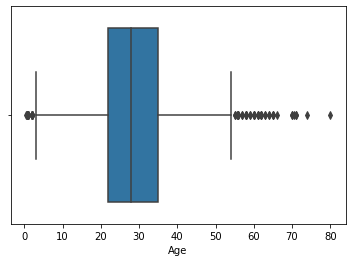

Fare


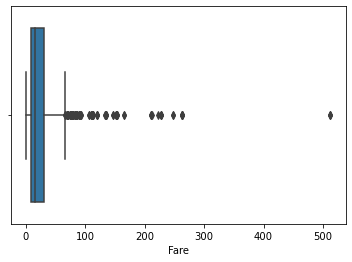

In [17]:
import seaborn as sns
for i in cont_cols:
    print(i)
    sns.boxplot(titanic_data[i])
    plt.show()

Age


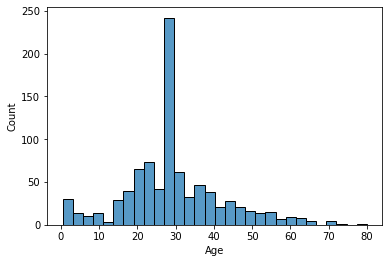

Fare


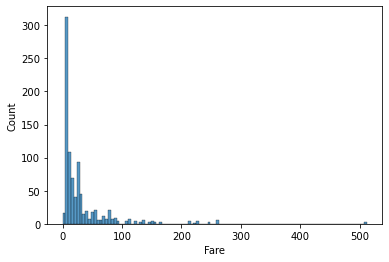

In [18]:
for i in cont_cols:
    print(i)
    sns.histplot(titanic_data[i])
    plt.show()

Survived


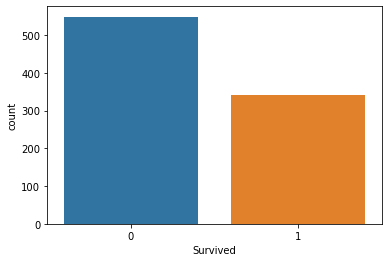

Pclass


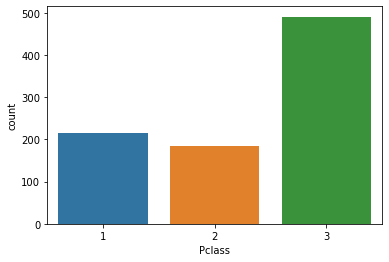

Sex


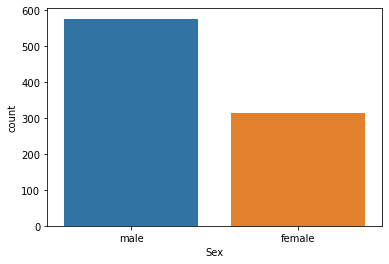

SibSp


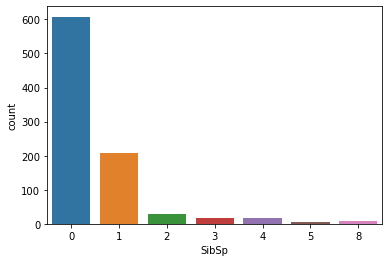

Parch


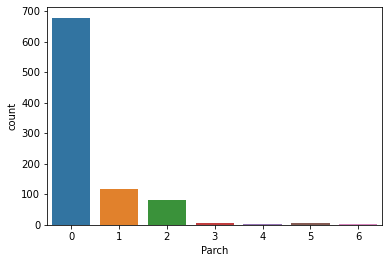

Embarked


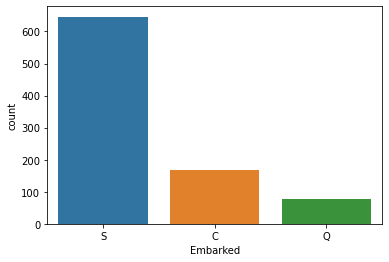

In [19]:
for i in cat_cols:
    print(i)
    sns.countplot(titanic_data[i])
    plt.show()

## Bivariate Analysis

Boxplot Age Vs Survived


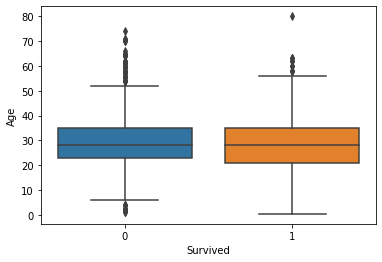

Boxplot Age Vs Pclass


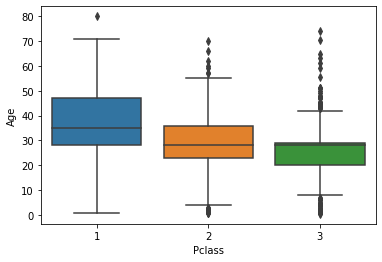

Boxplot Age Vs Sex


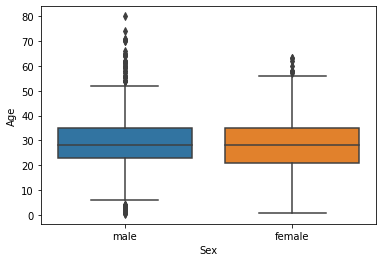

Boxplot Age Vs SibSp


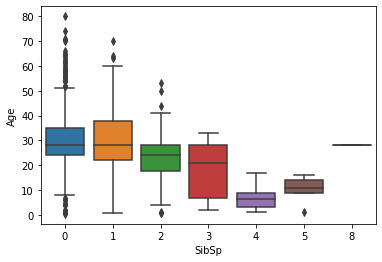

Boxplot Age Vs Parch


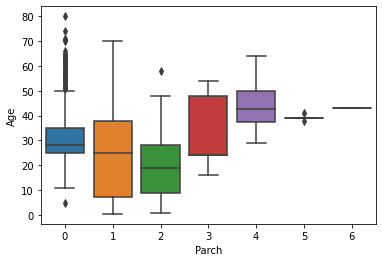

Boxplot Age Vs Embarked


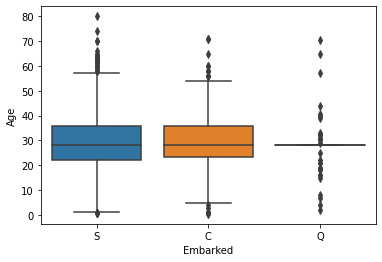

Boxplot Fare Vs Survived


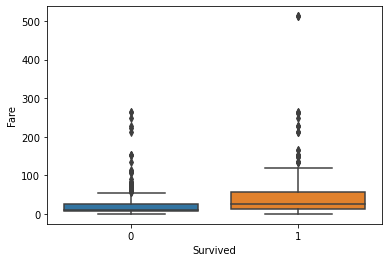

Boxplot Fare Vs Pclass


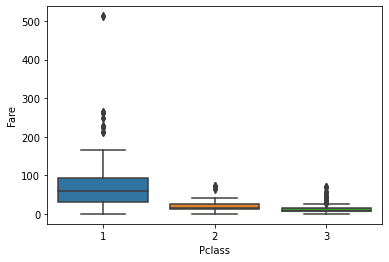

Boxplot Fare Vs Sex


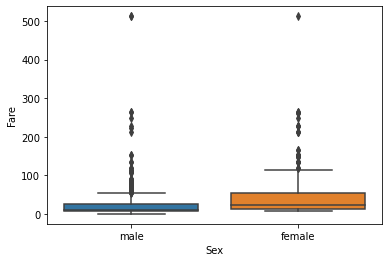

Boxplot Fare Vs SibSp


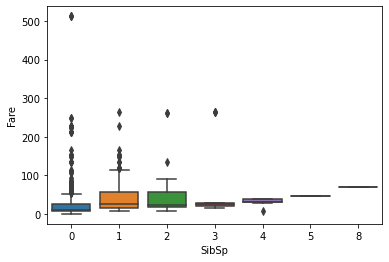

Boxplot Fare Vs Parch


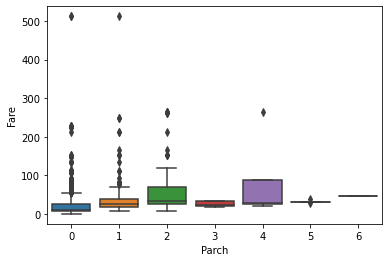

Boxplot Fare Vs Embarked


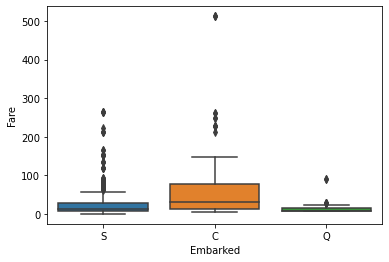

In [20]:
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"Vs",j)
        sns.boxplot(titanic_data[j],titanic_data[i])
        plt.show()

ScatterPlot Age Vs Fare


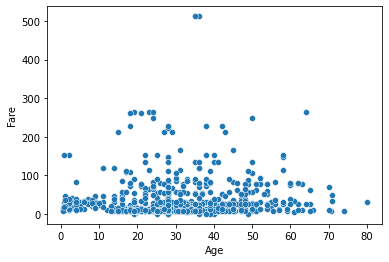

ScatterPlot Fare Vs Age


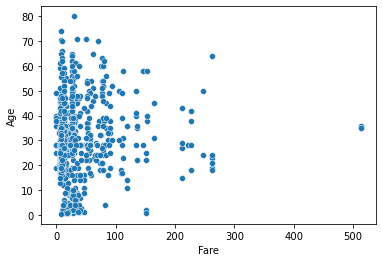

In [21]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(titanic_data[i],titanic_data[j])
            plt.show()

In [22]:
#mean of Age and Sum of Survived persons by Gender-Sex
titanic_data.groupby("Sex").agg({"Age":"mean",
                      "Survived":"sum",
                      })

,Age,Survived
Sex,,
female,27.929936,233
male,30.140676,109


In [23]:
#Mean of Survived persons by Gender
titanic_data.groupby("Sex").agg({"Survived":"mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
#it is clear to understand in each class how many peaople are lived or died and mean of Age&Survived persons
titanic_data.groupby("Pclass").agg({"Survived":"mean",
                         "Sex":"count",
                         "Age":"mean"})

,Survived,Sex,Age
Pclass,,,
1,0.629630,216,36.812130
2,0.472826,184,29.765380
3,0.242363,491,25.932627


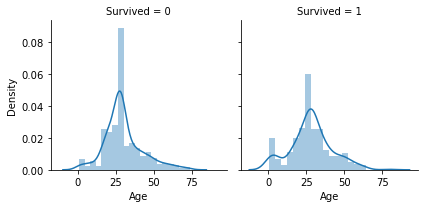

In [25]:
#we can see the majority of person in which age are Survived or not
g = sns.FacetGrid(titanic_data, col = "Survived")
g.map(sns.distplot, "Age", bins = 20)
plt.show()

## Multivariate Analysis

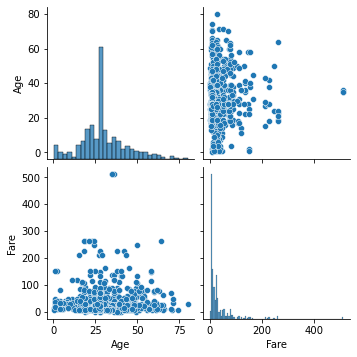

In [26]:
sns.pairplot(titanic_data[cont_cols])
plt.show()

<AxesSubplot:>

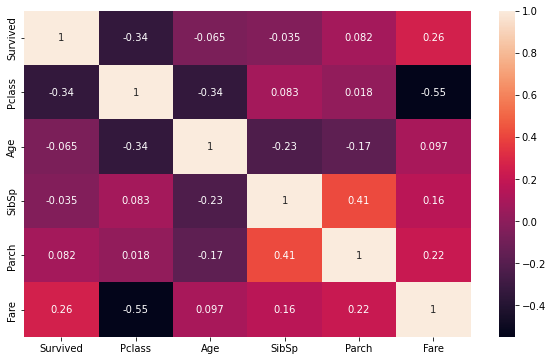

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_data.corr(),annot=True)

### Finding unique values and converting them into numerical.

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [29]:
# Convert categorical variables to numerical
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex']) # Male=1, Female=0
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked']) # C=0, Q=1, S=2

In [30]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Feature Selection

In [32]:
# Define features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest Classifier

In [34]:
# Build a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Evaluate the model

In [52]:
# Training Accuracy of Random Forest Classifier

print(f"Accuracy: {model.score(X_train,y_train)}")

Accuracy: 0.9807383627608347


In [53]:
# Testing Accuracy of Random Forest Classifier

print(f"Accuracy: {model.score(X_test,y_test)}")

Accuracy: 0.7835820895522388


In [50]:
#Confusion Matrix Random Forest Classifier 

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[132  25]
 [ 33  78]]


In [51]:
# Classification Report Random Forest Classifier
class_report = classification_report(y_test, y_pred)

print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



## Insights:

#### The model performs reasonably well with an overall accuracy of 78%.
#### Class 0 (did not survive) has higher precision, recall, and F1-score compared to class 1 (survived).
#### There is a slight imbalance in recall between the two classes, indicating potential room for improvement, especially in capturing more instances of passengers who survived.